텐서플로와 케라스 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

패션 데이터 불러오기 및 학습, 테스트 집합 분할

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

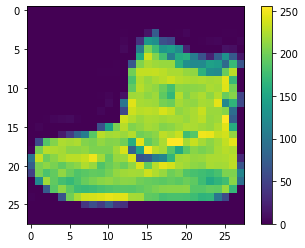

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

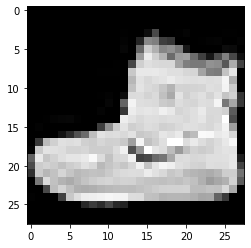

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
class_names[train_labels[0]]

'Ankle Boot'

In [ ]:
test_images.shape

(10000, 28, 28)

이미지 데이터 변환 및 검증 집합 생성

In [ ]:
valid_images, train_images = train_images[:5000]/255.0, train_images[5000:]/255.0
valid_labels, train_labels = train_labels[:5000], train_labels[5000:]
test_images = test_images/255.0

In [ ]:
train_images.shape

(55000, 28, 28)

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

신경망 모델 설정

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden = model.layers[1]
hidden.name

'dense'

In [ ]:
weights, biases = hidden.get_weights()
weights

array([[-0.06418622, -0.02111998,  0.0673949 , ...,  0.01539686,
         0.01961894, -0.06599365],
       [ 0.0473415 ,  0.06625602, -0.01977627, ..., -0.00724196,
        -0.00336079, -0.06428977],
       [-0.01512072,  0.04217944, -0.03508957, ...,  0.03062114,
        -0.05266066, -0.00145388],
       ...,
       [ 0.01420722,  0.01930347,  0.01999404, ..., -0.03120216,
        -0.04204863,  0.04274042],
       [-0.04966182,  0.05309771,  0.00801133, ...,  0.04696862,
         0.04703401, -0.03911903],
       [ 0.04761229,  0.0603108 , -0.06533036, ..., -0.02297531,
         0.04066816,  0.07089223]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

모델 컴파일 방안 설정 (optimizer, 손실함수, 정확도 측정 방안 등)

In [ ]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

모델 학습

In [ ]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=128,
                    validation_data=(valid_images, valid_labels))

Epoch 1/30
430/430 [==============================] - 4s 3ms/step - loss: 1.1025 - accuracy: 0.6575 - val_loss: 0.7081 - val_accuracy: 0.7710
Epoch 2/30
430/430 [==============================] - 1s 2ms/step - loss: 0.6429 - accuracy: 0.7920 - val_loss: 0.5683 - val_accuracy: 0.8182
Epoch 3/30
430/430 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.8151 - val_loss: 0.5214 - val_accuracy: 0.8302
Epoch 4/30
430/430 [==============================] - 1s 2ms/step - loss: 0.5145 - accuracy: 0.8263 - val_loss: 0.4933 - val_accuracy: 0.8354
Epoch 5/30
430/430 [==============================] - 1s 2ms/step - loss: 0.4874 - accuracy: 0.8333 - val_loss: 0.4656 - val_accuracy: 0.8464
Epoch 6/30
430/430 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.8380 - val_loss: 0.4527 - val_accuracy: 0.8492
Epoch 7/30
430/430 [==============================] - 1s 2ms/step - loss: 0.4544 - accuracy: 0.8420 - val_loss: 0.4505 - val_accuracy: 0.8438
Epoch 

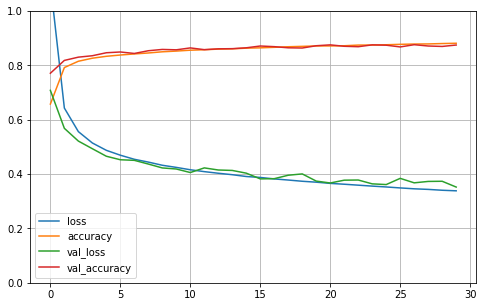

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # y 좌표를 [0-1]로 설정
plt.show()

예측 

In [ ]:
test_fashion = test_images[0:10]
predictions = model.predict(test_fashion)
predictions[0]

array([1.00635325e-05, 7.53460256e-07, 6.24951917e-06, 6.00996054e-06,
       6.08612390e-06, 5.99815696e-02, 1.36294939e-05, 7.05155581e-02,
       2.73431279e-03, 8.66725802e-01], dtype=float32)

In [ ]:
predictions[0].argmax()

9

In [ ]:
predictions[0][9]

0.8667258

In [ ]:
test_labels[0]

9

In [ ]:
class_names[test_labels[0]]

'Ankle Boot'

성과 측정

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc: %.4f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.8622
test_acc: 0.8622


슬라이싱 Slicing

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


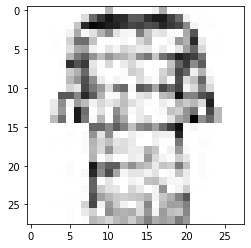

In [ ]:
my_image = train_images[10, :, :]

plt.imshow(my_image, cmap=plt.cm.binary)
plt.show()

In [ ]:
class_names[train_labels[10]]

'T-shirt/top'

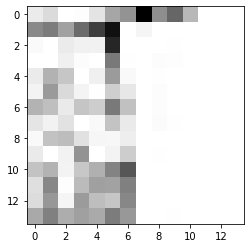

In [ ]:
my_image = train_images[10, 14:, 14:]

plt.imshow(my_image, cmap=plt.cm.binary)
plt.show()

배치 Batch 데이터

In [ ]:
batch_1 = train_images[:128]

batch_2 = train_images[128:256]

# batch_n = train_images[128*n:128*(n+1)]

GradientTape() 

- 자동 미분 
- 텐서 연산 가능 

In [ ]:
import tensorflow as tf

x = tf.Variable(0.)

with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))

with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.0659084, 1.0659084],
        [1.0186728, 1.0186728]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

영화 리뷰 분류 : 이진 분류 문제

- IMDB 리뷰 5만개 (긍정 50%, 부정 50%)
- 학습 데이터 25,000개, 테스트 데이터 25,000개
- Keras에 데이터가 포함되어 있음

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


- num_words = 10000 는 등장하는 단어 중 빈도수 상위 10,000 개 단어만 가지고 분석하겠다는 뜻임
- train_labels와 test_labels는 부정은 0, 긍정은 1 값을 가짐

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

첫번째 리뷰의 원래 내용 보기
- reverse_word_index 에서 -3 하는 이유는 0, 1, 2는 프로그래밍의 이유로 이미 사용되고 있음

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

데이터 준비
- 데이터를 동일한 차원으로 만들어줌. 10,000개의 단어를 사용하므로 10,000차원의 크기를 갖는 벡터 생성
- 10,000차원 모두 0의 값을 갖는 벡터 생성
- 단어 인덱스 [8, 5]를 갖는 리뷰라면 원-핫 인코딩을 통해 8, 5번 인덱스만 1 값을 갖고 나머지 인덱스에 해당하는 값은 모두 0으로 갖게 만들어줌

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
np.shape(x_train)

(25000, 10000)

train_labels와 test_labels도 벡터로 변경

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
y_train[0]

1.0

In [10]:
np.shape(y_train)

(25000,)

신경망 모형 만들기 
- 두 개의 중간층 (각 16개 노드 존재, 활성함수 ReLu)
- 출력층 (리뷰의 긍정 확률 출력, 활성함수 Sigmoid)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

- 옵티마이저 : rmsprop (여러 옵션 중 가장 기본적인 선택)
- 손실함수 : 이진분류 문제이므로 binary_crossentropy 선택
- 측정지표 : 정확도(accuracy)

In [12]:
 model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

학습 집합을 검증집합과 학습집합으로 분류
- 검증 집합은 생성된 모형의 성과를 측정하는 데 활용


In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

- 20 epochs(반복)
- 배치 사이즈 : 512

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 45ms/step - loss: 0.5067 - accuracy: 0.7877 - val_loss: 0.3714 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2975 - accuracy: 0.9036 - val_loss: 0.3073 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2186 - accuracy: 0.9293 - val_loss: 0.2816 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1715 - accuracy: 0.9441 - val_loss: 0.2751 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1388 - accuracy: 0.9573 - val_loss: 0.3194 - val_accuracy: 0.8778
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1162 - accuracy: 0.9649 - val_loss: 0.2952 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0943 - accuracy: 0.9726 - val_loss: 0.3135 - val_accuracy: 0.8831
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

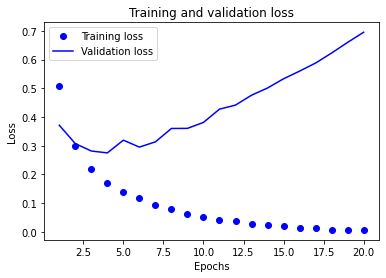

In [16]:
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

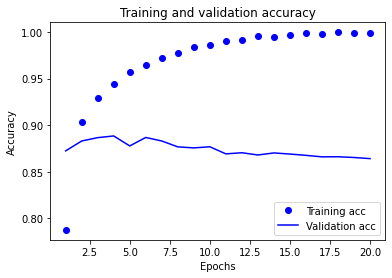

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

성과가 제일 좋은 최적 epoch 수 선정

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4483 - accuracy: 0.8235
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2541 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1973 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3071 - accuracy: 0.8788


results (loss_value, metrics value)

In [19]:
results

[0.30708348751068115, 0.8787999749183655]

테스트 집합에 대한 예측치 생성

In [20]:
model.predict(x_test)

array([[0.1672511 ],
       [0.9999583 ],
       [0.7078029 ],
       ...,
       [0.07970449],
       [0.05708531],
       [0.48083952]], dtype=float32)

In [21]:
y_pred = np.where(model.predict(x_test) > 0.5, 1, 0)

In [22]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [23]:
import sklearn.metrics as sm

sm.accuracy_score(y_test, y_pred)

0.8788

In [ ]:
sm.precision_score(y_test, y_pred)

0.8648958971218617

In [ ]:
sm.recall_score(y_test, y_pred)

0.90392

In [ ]:
sm.f1_score(y_test, y_pred)

0.8839774683148177

In [ ]:
sm.roc_auc_score(y_test, y_pred)

0.8813599999999999